In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
mel_data = pd.read_csv('melbourne_data_processed.csv')
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 10 columns):
Suburb      34857 non-null object
Address     34857 non-null object
Rooms       34857 non-null int64
Type        34857 non-null object
Price       34857 non-null float64
Method      34857 non-null object
SellerG     34857 non-null object
Date        34857 non-null object
Distance    34857 non-null float64
Car         34857 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.7+ MB


In [15]:
mel_data.isna().sum()

Suburb      0
Address     0
Rooms       0
Type        0
Price       0
Method      0
SellerG     0
Date        0
Distance    0
Car         0
dtype: int64

In [16]:
#Transpose makes things easy to view and rounf of to decimal places 2
mel_data.describe().transpose().round(2) 

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.03,0.97,1.0,2.0,3.00,4.0,16.0
Price,34857.0,1050173.34,567135.73,85000.0,695000.0,1050173.34,1150000.0,11200000.0
Distance,34857.0,11.18,6.79,0.0,6.4,10.30,14.0,48.1
Car,34857.0,1.80,0.88,0.0,1.0,2.00,2.0,26.0


In [32]:
#We are only seeing numeric features 
numeric_types = ['int16','int32','int64','float16','float32','float64']
numeric_columns = list(mel_data.select_dtypes(include=numeric_types).columns)
numeric_columns

['Rooms', 'Price', 'Distance', 'Car']

In [33]:
clean_data_numeric = mel_data[numeric_columns]
clean_data_numeric.head()

,Rooms,Price,Distance,Car
0,2,1.050173e+06,2.5,1.0
1,2,1.480000e+06,2.5,1.0
2,2,1.035000e+06,2.5,0.0
3,3,1.050173e+06,2.5,1.0
4,3,1.465000e+06,2.5,0.0


In [34]:
clean_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 4 columns):
Rooms       34857 non-null int64
Price       34857 non-null float64
Distance    34857 non-null float64
Car         34857 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.1 MB


In [35]:
pearson_corr = clean_data_numeric.corr(method='pearson')
pearson_corr

,Rooms,Price,Distance,Car
Rooms,1.000000,0.404908,0.271511,0.317095
Price,0.404908,1.000000,-0.186848,0.141143
Distance,0.271511,-0.186848,1.000000,0.204164
Car,0.317095,0.141143,0.204164,1.000000


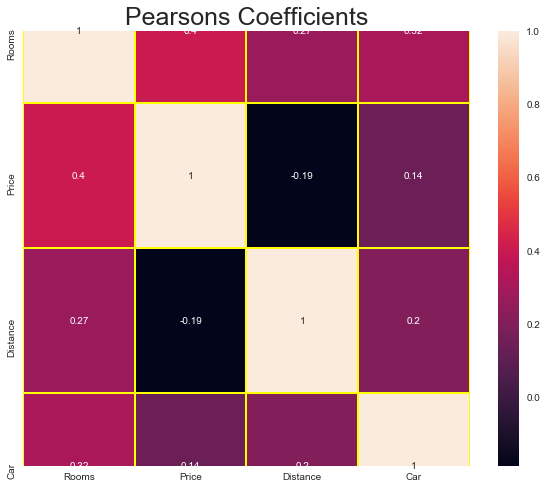

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr, linecolor='yellow', linewidths=1, annot=True, annot_kws={'size':10})
plt.title('Pearsons Coefficients', fontsize=25)
plt.show()

# YellowBrick Installation for Visualizing

In [37]:
!pip install yellowbrick --upgrade

Requirement already up-to-date: yellowbrick in c:\programdata\anaconda3\lib\site-packages (1.1)


In [38]:
target = clean_data_numeric['Price']
features = clean_data_numeric.drop('Price', axis=1)

In [39]:
from yellowbrick.target import FeatureCorrelation
feat_names = list(features.columns)

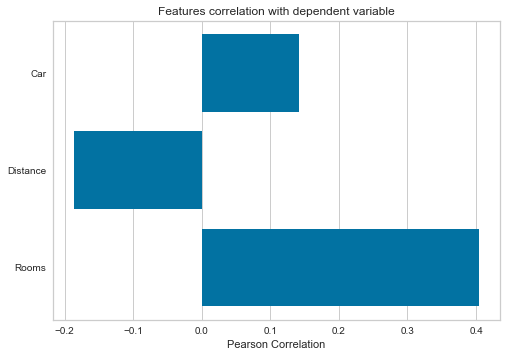

In [40]:
visualizer = FeatureCorrelation(labels= feat_names, method='pearson')
visualizer.fit(features, target)
visualizer.poof()

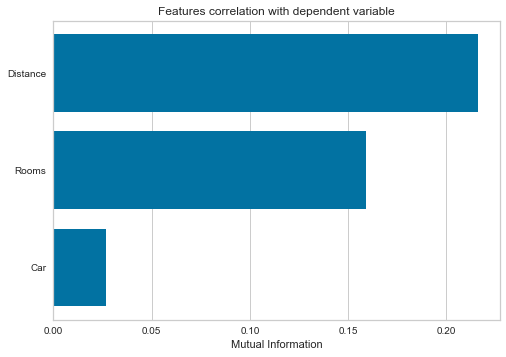

In [42]:
visualizer = FeatureCorrelation(method='mutual_info-regression', feature_names=feat_names, sort=True)
visualizer.fit(features, target)
visualizer.poof()